## Data pre-processing and Analysis
***
### 1. Load the datasets:

In [1]:
import pandas as pd 
import numpy as np 

path_train_final ='D:/Rutgers/MS-Rutgers/AlgorthmicMachineLrn/Projects/Expedia/DataSet/expedia-hotel-recommendations/final.csv'
path_in_test = 'D:/Rutgers/MS-Rutgers/AlgorthmicMachineLrn/Projects/Expedia/DataSet/expedia-hotel-recommendations/testfinal.csv'

train_set=pd.read_csv(path_train_final) #nrows=10000000limiting no. of rows to avoid memory issues
test_set=pd.read_csv(path_in_test)

#### Modeling

#### 1. Random Forest

In [2]:
train_set = train_set[train_set['stay_dur']>0]
train_set = train_set[train_set['no_of_days_before_booking'] >0]
train_set = train_set.reset_index(drop=True)

In [32]:
predictors = [c for c in train_set.columns if c not in ["hotel_cluster"]]
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=80, min_weight_fraction_leaf=0.1)
scores = cross_validate(clf, train_set[predictors], train_set['hotel_cluster'], cv=3)
scores

#{'fit_time': array([120.77289391, 125.37280703, 139.86872172]),
 #'score_time': array([49.67849874, 36.88312197, 46.26390409]),
 #'test_score': array([0.08684936, 0.08552928, 0.07872241])}

 #{'fit_time': array([195.56507802, 330.86655831, 302.63108897]),
 #'score_time': array([ 51.06181788, 150.06989646,  48.70174479]),
 #'test_score': array([0.09029872, 0.0871309 , 0.08997684])}

{'fit_time': array([81.06027889, 81.80743003, 80.69273472]),
 'score_time': array([23.17094636, 22.96865702, 24.56702709]),
 'test_score': array([0.08768024, 0.09056604, 0.09117442])}

In [5]:
from sklearn.metrics import accuracy_score
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
predictors = [c for c in train_set.columns if c not in ["hotel_cluster"]]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_params = {
    "criterion": ['gini','entropy'],
    "n_estimators": [10,50,100,200,500,750,1000,2000],
    "max_features": ['auto','log2',None]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, scoring='average_precision', cv=3, verbose=10)
rf_grid.fit(train_set[predictors], train_set['hotel_cluster'])

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START criterion=gini, max_features=auto, n_estimators=10.........
[CV 1/3; 1/48] END criterion=gini, max_features=auto, n_estimators=10;, score=nan total time=   0.2s
[CV 2/3; 1/48] START criterion=gini, max_features=auto, n_estimators=10.........
[CV 2/3; 1/48] END criterion=gini, max_features=auto, n_estimators=10;, score=nan total time=   0.2s
[CV 3/3; 1/48] START criterion=gini, max_features=auto, n_estimators=10.........
[CV 3/3; 1/48] END criterion=gini, max_features=auto, n_estimators=10;, score=nan total time=   0.2s
[CV 1/3; 2/48] START criterion=gini, max_features=auto, n_estimators=50.........
[CV 1/3; 2/48] END criterion=gini, max_features=auto, n_estimators=50;, score=nan total time=   0.2s
[CV 2/3; 2/48] START criterion=gini, max_features=auto, n_estimators=50.........
[CV 2/3; 2/48] END criterion=gini, max_features=auto, n_estimators=50;, score=nan total time=   0.2s
[CV 3/3; 2/48] START criteri

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
predictorst = [c for c in test_setv2.columns if c not in ["hotel_cluster"]]

clf = RandomForestClassifier(n_estimators=80)
clf.fit(train_setv2[predictors], train_setv2['hotel_cluster'])

y_pred=clf.predict(test_setv2[predictorst])

NameError: name 'GridSearchCV' is not defined

In [ ]:
Y_test = test_setv2[predictorst]
y_pred = test_setv2['hotel_cluster']
acc=accuracy_score(Y_test,y_pred)
prec=precision_score(Y_test, y_pred, average="micro")
recall=recall_score(Y_test, y_pred,  average="micro")
f1_v=f1_score(Y_test, y_pred,  average="micro")

print("Accuracy:" , acc)
print("Precision:" , prec)
print("Recall: ", recall)
print("F1 Score:", f1_v)
print("\n")
print("-----------------------------------------------------------------")
print("\n")
print( "Confusion Matrix")
print( confusion_matrix(Y_test, y_pred))

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=20)
scores = cross_validate(knn_model, train_setv2[predictors], train_setv2["hotel_cluster"], cv=3)
scores

#{'fit_time': array([0.76627135, 1.2260263 , 0.49789762]),
 #'score_time': array([2020.08063483, 2283.16265965, 1513.51173759]),
 #'test_score': array([-0.05580491, -0.05518255, -0.05623685])}

{'fit_time': array([0.76627135, 1.2260263 , 0.49789762]),
 'score_time': array([2020.08063483, 2283.16265965, 1513.51173759]),
 'test_score': array([-0.05580491, -0.05518255, -0.05623685])}

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#### Which country has the highest bookings? 

[Text(0.5, 1.0, 'Top 30 countries by bookings')]

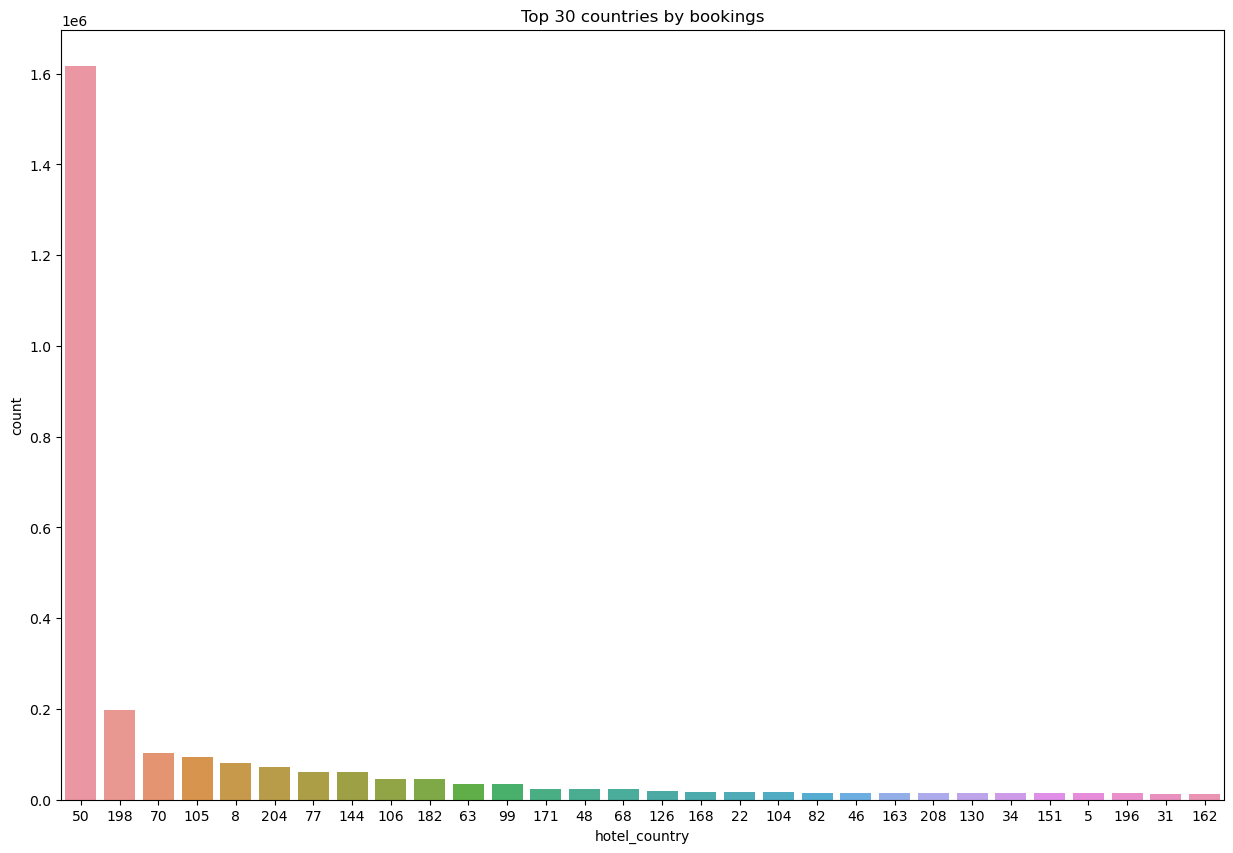

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x='hotel_country',data=train_set,order=train_set.value_counts(train_set['hotel_country']).iloc[:30].index).set(title="Top 30 countries by bookings")

#### Where are most of the customers from? 

[Text(0.5, 1.0, 'Top 30 countries based on customer base')]

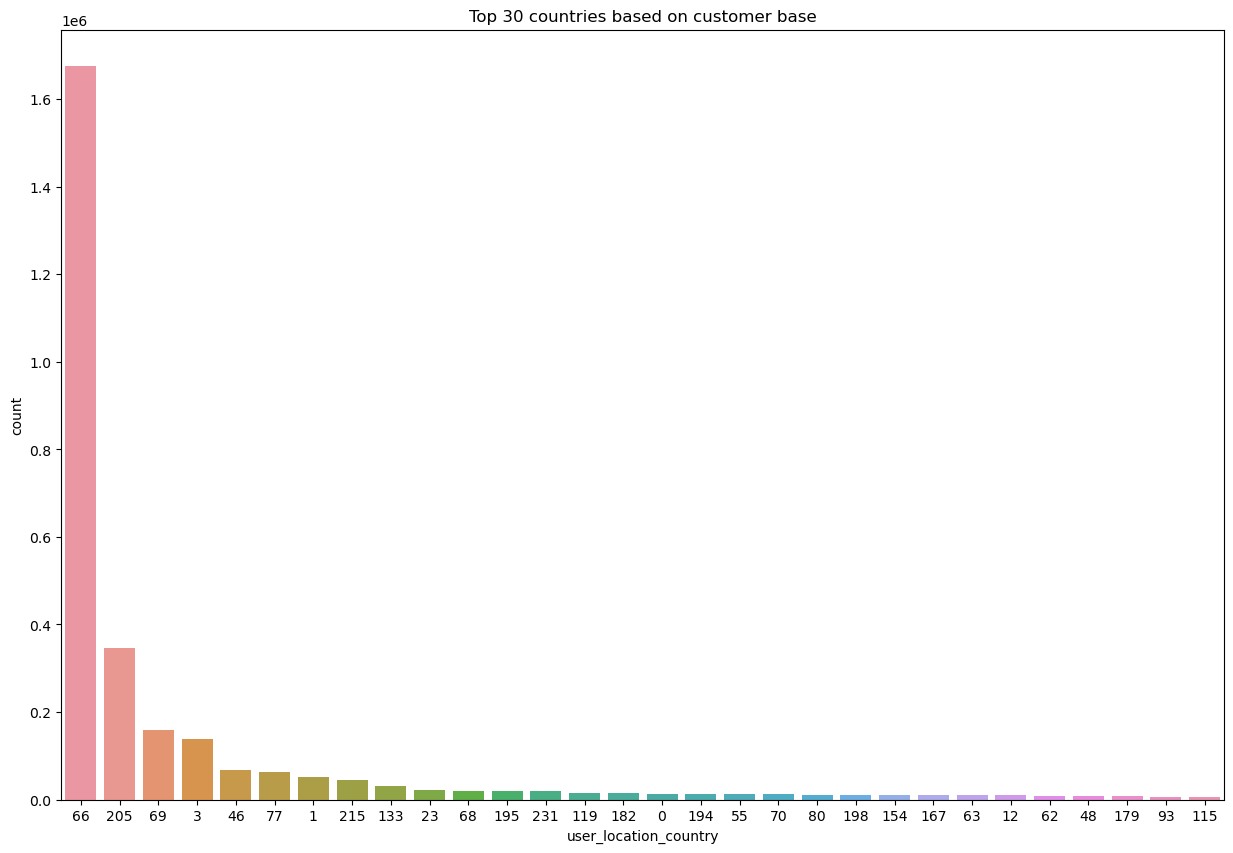

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='user_location_country',data=train_set,order=train_set.value_counts(train_set['user_location_country']).iloc[:30].index).set(title="Top 30 countries based on customer base")

#### Frequency of each hotel cluster? 

[Text(0.5, 1.0, 'Top 30 clusters')]

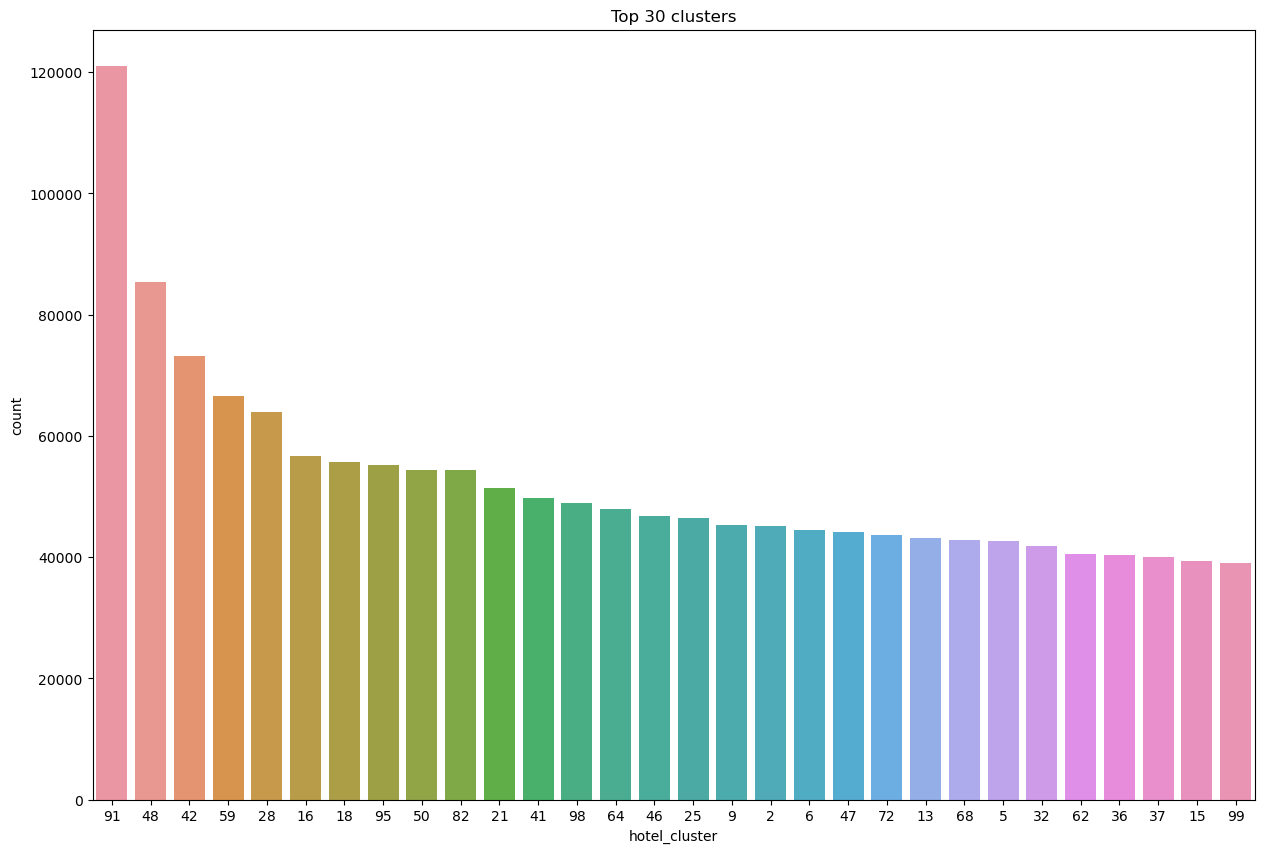

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x='hotel_cluster',data=train_set,order=train_set.value_counts(train_set['hotel_cluster']).iloc[:30].index).set(title="Top 30 clusters")

#### The most frequent hotel clusters in the highest booked country?

[Text(0.5, 1.0, 'Top 30 clusters for highest booked country')]

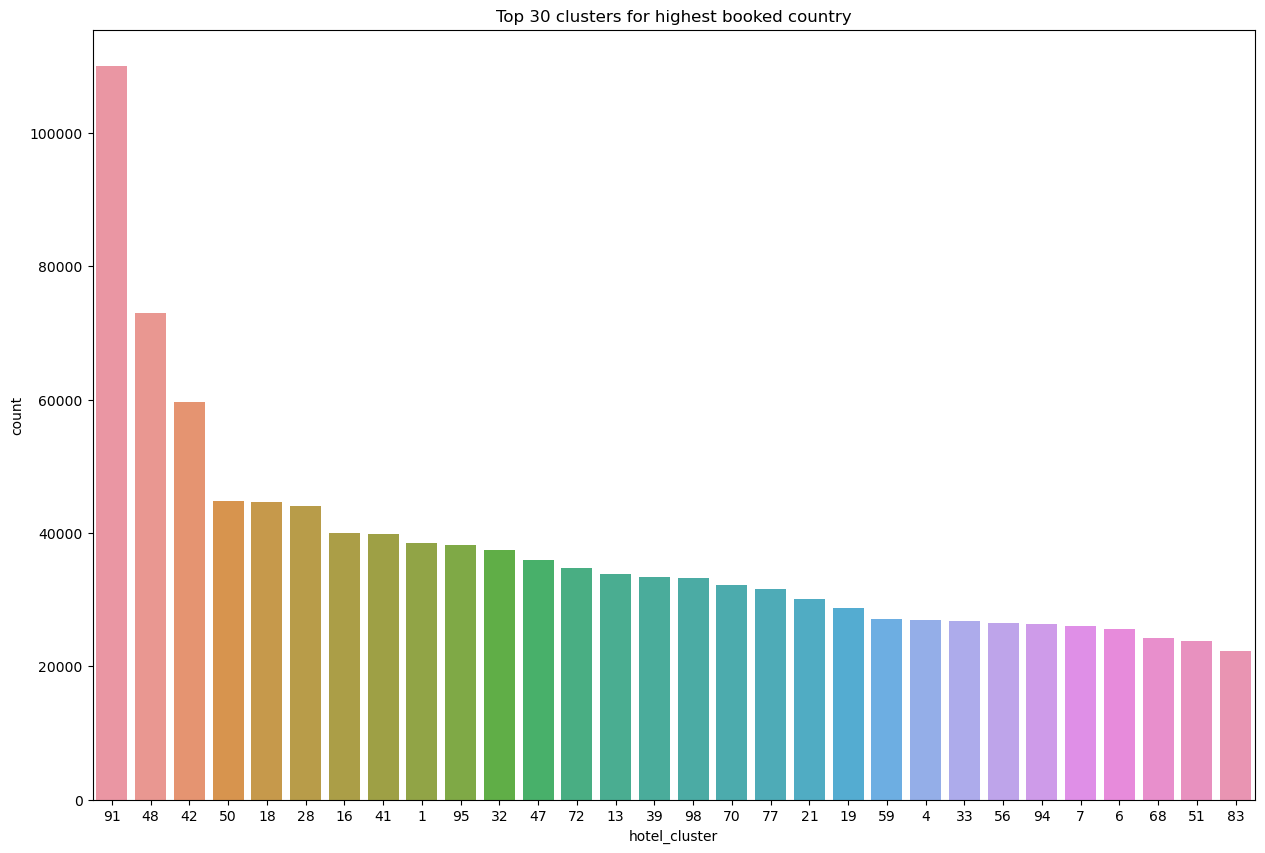

In [21]:
cluster_data=train_set[train_set['hotel_country']==50]
plt.figure(figsize=(15,10))
sns.countplot(x='hotel_cluster',data=cluster_data,order=cluster_data.value_counts(cluster_data['hotel_cluster']).iloc[:30].index).set(title="Top 30 clusters for highest booked country")

#### Are most bookings through mobile or other devices?
#### For reference- Booking by mobile-1, Booking by other devices-0

[Text(0.5, 1.0, 'Bookings by device')]

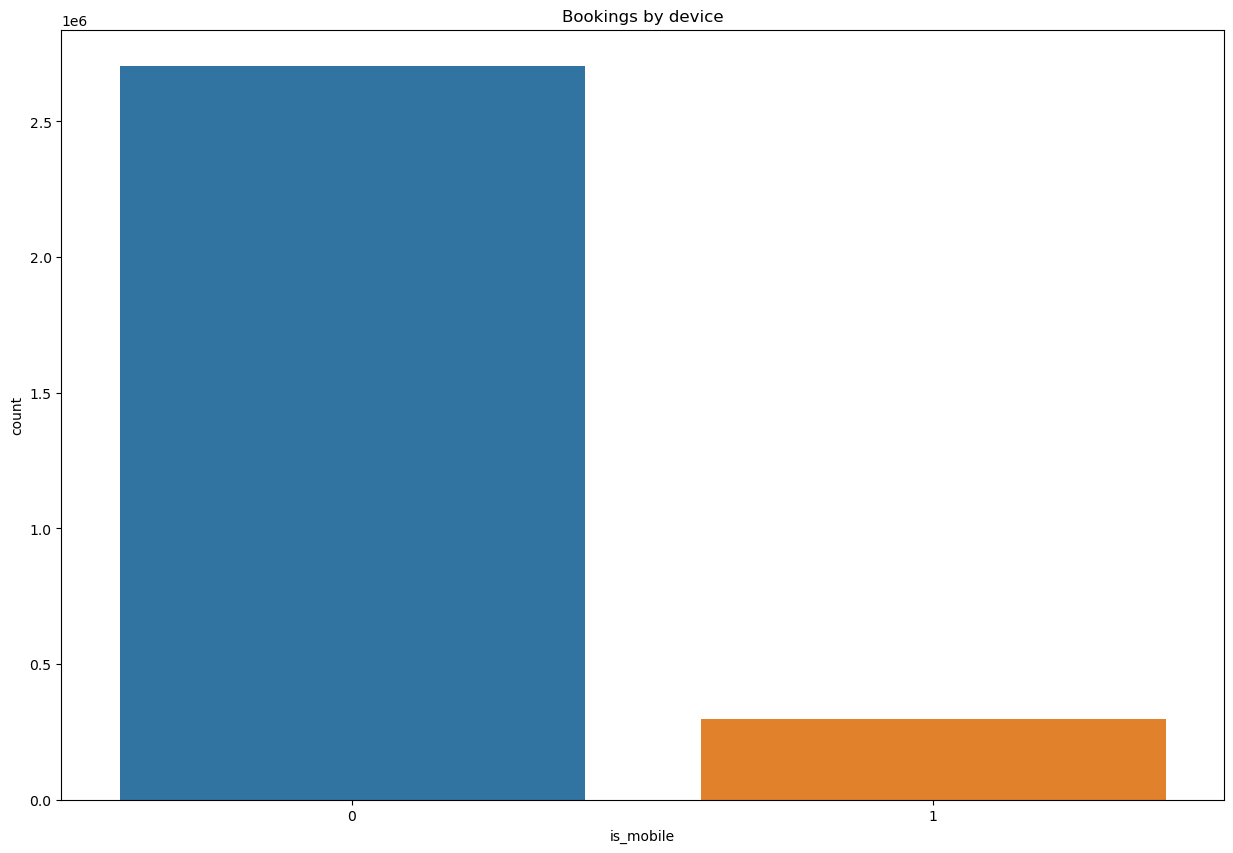

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(x='is_mobile',data=train_set).set(title="Bookings by device")